In [1]:
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load the Data

In [2]:
# the mean imputed data
df_train_mean = pd.read_csv(r"data\training_mean_imputed.csv")
df_test_mean = pd.read_csv(r"data\test_mean_imputed.csv")

# the iterative imputed data
df_train_iter = pd.read_csv(r"data\training_iter_imputed.csv")
df_test_iter = pd.read_csv(r"data\test_iter_imputed.csv")

In [3]:
X_train_mean = df_train_mean.drop(columns="Potability")
y_train_mean = df_train_mean["Potability"]

X_test_mean = df_test_mean.drop(columns="Potability")
y_test_mean = df_test_mean["Potability"]

X_train_iter = df_train_iter.drop(columns="Potability")
y_train_iter = df_train_iter["Potability"]

X_test_iter = df_test_iter.drop(columns="Potability")
y_test_iter = df_test_iter["Potability"]

## Train Baseline Model

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [5]:
# Train the logistic regression model and use this as baseline for comparison
from sklearn.linear_model import LogisticRegression

log_model_mean = LogisticRegression()
log_model_mean.fit(X_train_mean, y_train_mean)

preds_mean = log_model_mean.predict(X_test_mean)
print(f"Test Acc: {accuracy_score(y_test_mean, preds_mean)}")
print(f"Test F1-Score: {f1_score(y_test_mean, preds_mean)}")
print(f"Test Precision: {precision_score(y_test_mean, preds_mean)}")
print(f"Test Recall: {recall_score(y_test_mean, preds_mean)}")

Test Acc: 0.6265243902439024
Test F1-Score: 0.0
Test Precision: 0.0
Test Recall: 0.0


C:\Users\brusp\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Train the logistic regression model and use this as baseline for comparison
from sklearn.linear_model import LogisticRegression

log_model_iter = LogisticRegression()
log_model_iter.fit(X_train_iter, y_train_iter)

preds_iter = log_model_iter.predict(X_test_iter)
print(f"Test Acc: {accuracy_score(y_test_iter, preds_iter)}")
print(f"Test F1-Score: {f1_score(y_test_iter, preds_iter)}")
print(f"Test Precision: {precision_score(y_test_iter, preds_iter)}")
print(f"Test Recall: {recall_score(y_test_iter, preds_iter)}")

Test Acc: 0.6265243902439024
Test F1-Score: 0.0
Test Precision: 0.0
Test Recall: 0.0


C:\Users\brusp\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train Other Models

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict

In [31]:
dict_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Nearest Neighbor": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier()
}

In [32]:
results_dict = {}
for model_name, model in dict_models.items():
    print(f"Start training {model_name}...")
    preds = cross_val_predict(model, X_train_mean, y_train_mean, cv=5)
    
    f1 = f1_score(y_train_mean, preds)
    precision = precision_score(y_train_mean, preds)
    recall = recall_score(y_train_mean, preds)

    print(f"F1-Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("\n\n")
    results_dict[model_name] = (f1, precision, recall)

Start training Decision Tree...
F1-Score: 0.4845898530109056
Precision: 0.474907063197026
Recall: 0.494675701839303



Start training SVM...
F1-Score: 0.4114832535885168
Precision: 0.7
Recall: 0.29138431752178123



Start training Nearest Neighbor...
F1-Score: 0.44189852700491
Precision: 0.50625
Recall: 0.3920619554695063



Start training Random Forest...
F1-Score: 0.4395742016280526
Precision: 0.6223404255319149
Recall: 0.33978702807357214



Start training Ada Boost...
F1-Score: 0.2874659400544959
Precision: 0.4850574712643678
Recall: 0.2042594385285576





In [33]:
df_results = (pd.DataFrame.from_dict(results_dict, orient="index", columns=["F1-Score", "Precision", "Recall"])
             .sort_values(by="F1-Score", ascending=False))
df_results

,F1-Score,Precision,Recall
Decision Tree,0.484590,0.474907,0.494676
Nearest Neighbor,0.441899,0.506250,0.392062
Random Forest,0.439574,0.622340,0.339787
SVM,0.411483,0.700000,0.291384
Ada Boost,0.287466,0.485057,0.204259


For the sake of easy interpretation, the following models shall be examined further by applying hyper-parameter optimization on them: 
1. Decision Tree
2. Random Forest

## Optimize Final Candidates

In [14]:
from sklearn.model_selection import GridSearchCV

params_decision_tree = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [4, 5, 10, None],
    "min_samples_split": [2, 4, 6],
    "class_weight": [None, "balanced"]
}

clf_decision_tree = GridSearchCV(DecisionTreeClassifier(), params_decision_tree, scoring="f1", cv=5, verbose=1)
clf_decision_tree.fit(X_train_mean, y_train_mean)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10, None],
                         'min_samples_split': [2, 4, 6]},
             scoring='f1', verbose=1)

In [18]:
print(f"Best f1-score: {clf_decision_tree.best_score_}")
print(f"Best parameters: {clf_decision_tree.best_params_}")
best_decision_tree_model = clf_decision_tree.best_estimator_

Best f1-score: 0.48602147815854246
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}


In [19]:
params_random_forest = {
    "n_estimators" : [10, 20, 50, 100, 150],
    "criterion" : ["gini", "entropy"],
    "max_depth" : [4, 5, 10, None],
    "min_samples_split": [2, 4, 6],
    "class_weight": [None, "balanced", "balanced_subsample"],
    "bootstrap": [True, False],
    
}

clf_random_forest = GridSearchCV(RandomForestClassifier(), params_random_forest, scoring="f1", cv=5, verbose=1)
clf_random_forest.fit(X_train_mean, y_train_mean)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10, None],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 50, 100, 150]},
             scoring='f1', verbose=1)

In [20]:
print(f"Best f1-score: {clf_random_forest.best_score_}")
print(f"Best parameters: {clf_random_forest.best_params_}")
best_random_forest_model = clf_random_forest.best_estimator_

Best f1-score: 0.5097757401266291
Best parameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 50}


Done. The random forest achieves the best f1-score. But in general, the f1-score is still very low. In future, it would be required to have better data where the correlation of the features on the target are larger. Maybe also a larger data set would help. But for this analysis, the achieved score is sufficient.

## Evaluate Final Model on Test set

In [34]:
final_preds = best_random_forest_model.predict(X_test_mean)

f1 = f1_score(y_test_mean, final_preds)
precision = precision_score(y_test_mean, final_preds)
recall = recall_score(y_test_mean, final_preds)

print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1-Score: 0.5054466230936818
Precision: 0.5420560747663551
Recall: 0.47346938775510206


## Feature Importance

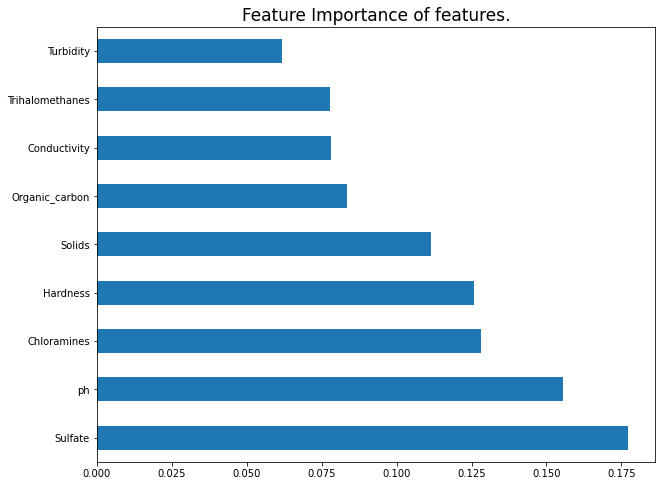

In [24]:
fig = plt.figure(figsize=(10, 8))
feat_importances = pd.Series(best_random_forest_model.feature_importances_, index=X_train_mean.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.title("Feature Importance of features.", size=17)
plt.show()